# Analytical data of Final Fantasy 14 Characters

In [114]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import matplotlib.patheffects as effects

data = pandas.read_csv('../../resources/cleaned.csv')

## Players choice of faction / grand company
The players choose a grand company along the level 20 MSQ (Main Story Quest) [A Hero in the Making](https://ffxiv.consolegameswiki.com/wiki/A_Hero_in_the_Making).
Unaligned meens the player did not complete this quest thus did not choose a grand company to align with.

In [115]:
print(data['faction'].value_counts())

faction
Unaligned                  1367533
Immortal Flames             295905
Order of the Twin Adder     290471
Maelstrom                   240880
Name: count, dtype: int64


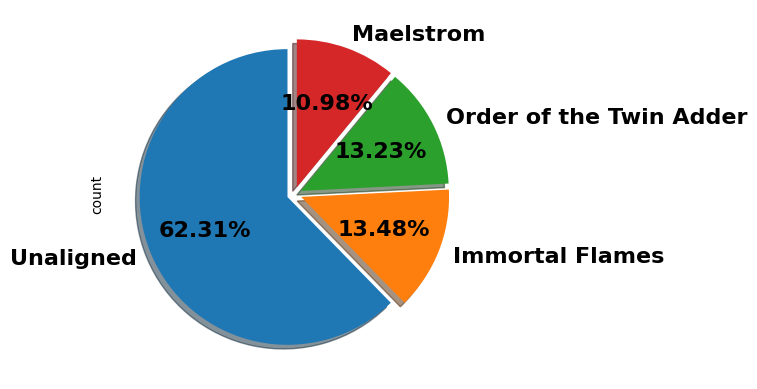

In [116]:
explode = (0.05,0.05,0.05,0.05)
textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
data['faction'].value_counts().plot.pie(
    autopct='%1.2f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops=textprops,
)
pyplot.show()

The high percentage of Unaligned players indicate bot accounts or players not sticking around until level 20. To reduce the chance of bot accounts or alts poisonig the data let's remove all players with all jobs at level 1 or 0 (meaning they pretty much did not play the game at all)

In [117]:
combat_jobs = [
    'PLD',
    'WAR',
    'DRG',
    'MNK',
    'BRD',
    'BLM',
    'WHM',
    'NIN',
    'SMN',
    'SCH',
    'DRK',
    'MCH',
    'AST',
    'SAM',
    'RDM',
    'BLU',
    'GNB',
    'DNC',
    'RPR',
    'SGE',
    'VPR',
    'PCT'
]
data['max_combat_lvl'] = data[combat_jobs].max(axis=1)

gathering_jobs = ['BTN', 'FSH', 'MIN']
data['max_gathering_lvl'] = data[gathering_jobs].max(axis=1)

crafting_jobs = ['ALC', 'ARM', 'BSM', 'CRP', 'CUL', 'GSM', 'LTW', 'WVR']
data['max_crafting_lvl'] = data[crafting_jobs].max(axis=1)

data_no_lvl_1 = data[data['max_combat_lvl'] > 1]
print(f"{len(data) - len(data_no_lvl_1):_} level 1 characters were in the dataset")

377_765 level 1 characters were in the dataset


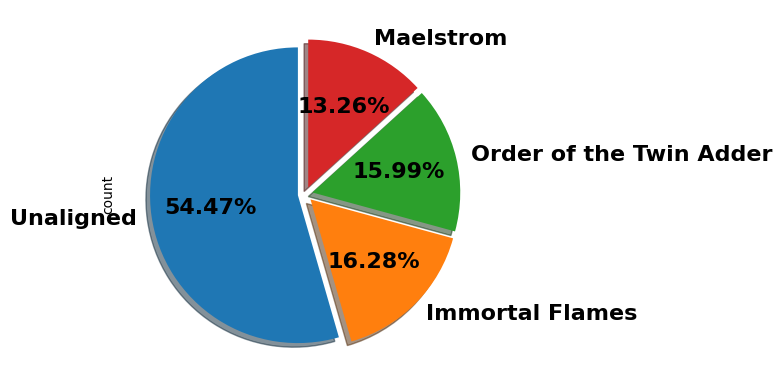

In [118]:
explode = (0.05,0.05,0.05,0.05)
textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
data_no_lvl_1['faction'].value_counts().plot.pie(
    autopct='%1.2f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops=textprops,
)
pyplot.show()

Now the numbers of Unaligned players is singnificantly lower, could FFXIV have an issue of players quiting early?

## Player starting city

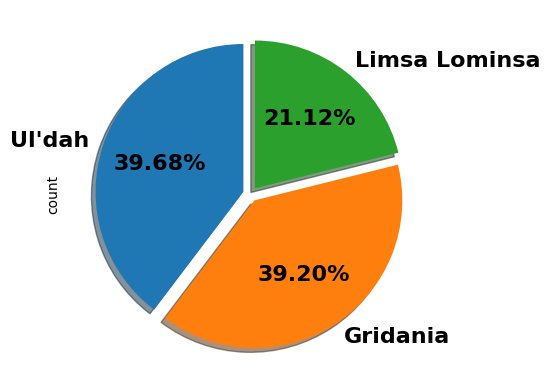

In [119]:
explode = (0.05,0.05,0.05)
textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
data['City-state'].value_counts().plot.pie(
    autopct='%1.2f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops=textprops,
)
pyplot.show()

## Players in a group

#### Players in a free company / guild

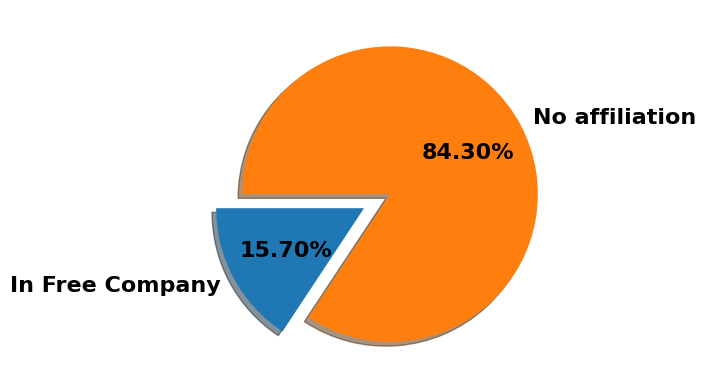

In [120]:
players_in_fc = data['fc'].count()
players_not_in_fc = data['fc'].isna().sum()

textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
explode = [0.2, 0]
fc_data = numpy.array([players_in_fc, players_not_in_fc])
labels = ['In Free Company', 'No affiliation']
pyplot.pie(
    fc_data,
    labels=labels,
    startangle=180,
    autopct='%1.2f%%',
    shadow=True,
    textprops=textprops,
    explode=explode,
)
pyplot.show()

Once again, the low percentage of players not a free company (player guild) can be explained by the bot characters in the dataset, so let's check with them excluded:

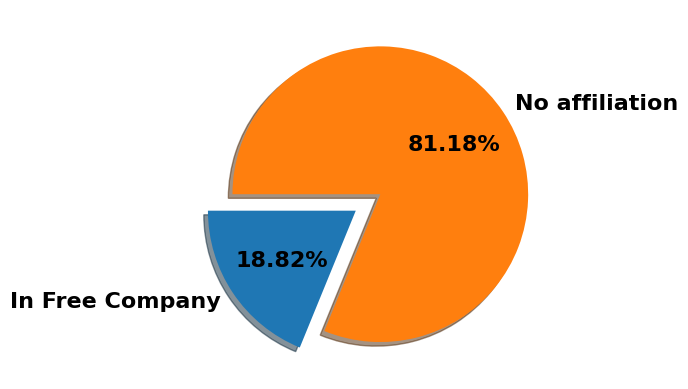

In [121]:
players_in_fc = data_no_lvl_1['fc'].count()
players_not_in_fc = data_no_lvl_1['fc'].isna().sum()

textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
explode = [0.2, 0]
fc_data = numpy.array([players_in_fc, players_not_in_fc])
labels = ['In Free Company', 'No affiliation']
pyplot.pie(
    fc_data,
    labels=labels,
    startangle=180,
    autopct='%1.2f%%',
    shadow=True,
    textprops=textprops,
    explode=explode,
)
pyplot.show()

The increase in free company membership is lower than expected, most likely reasons are
* Players quiting at a lower level
* Trial characters can't join free companies
Unfortunately we have no way of knowing if a player is a trial character or not based on the dataset.

#### Players in a PVP Team

Player in PVP team 3185
Plaer without PVP team 2191604


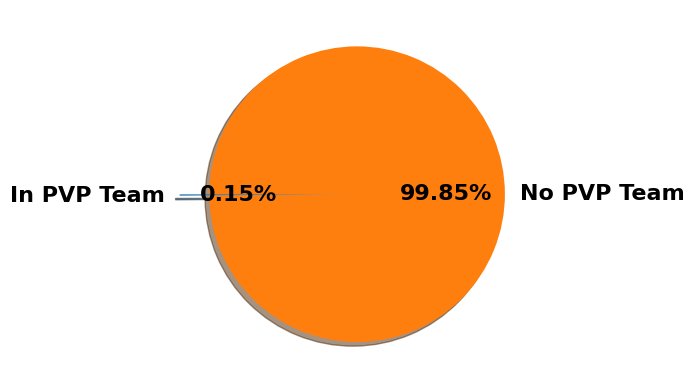

In [122]:
in_pvp_team = len(data[data['pvp'] != 'Unaligned'])
without_pvp_team = len(data[data['pvp'] == 'Unaligned'])

print(f'Player in PVP team {in_pvp_team}')
print(f'Plaer without PVP team {without_pvp_team}')

textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold'
}
explode = [0.2, 0]
pvp_data = numpy.array([in_pvp_team, without_pvp_team])
labels = ['In PVP Team', 'No PVP Team']
pyplot.pie(
    pvp_data,
    labels=labels,
    startangle=180,
    autopct='%1.2f%%',
    shadow=True,
    textprops=textprops,
    explode=explode,
)
pyplot.show()

Players in a PVP team are surprisingly rare, this can be explained by multiple causes:
* PVP in FFXIV is famous for being awful, even though it received improvements, so not many players engage with this mode of gameplay
* PVP Teams let you be in the same team with your friends during a PVP match, most players either don't care (or don't have friends)

## Character race and gender
Aka let's figure out how many catgirls there are in FFXIV...

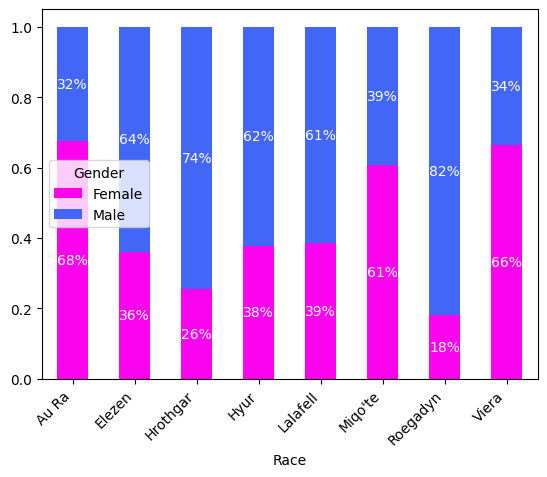

In [123]:
race_gender_counts = pandas.crosstab(data['Race'], data['Gender'])
race_gender_percentage = race_gender_counts.div(race_gender_counts.sum(axis=1), axis=0)
textprops = {
    'size': 16,
    'color':'black',
    'weight':'bold',
}
ax = race_gender_percentage.plot.bar(
    stacked=True,
    color=['#fc03f0', '#4266f5'],
)
labels = [f'{i:.0%}' for i in race_gender_percentage.to_numpy().flatten(order='F')]
for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
pyplot.xticks(rotation=45, ha='right')
pyplot.show()

These percentages are not very helpful for us, but reveals a couple of interesting information:
* Races which were gender locked at some point show a visible bias
  * Hrothgar was locked to Male up until 2024 Summer
  * Viera was locked to Female up until 2021 Female
* Races where one of the genders are more visually appealing to most people also show a clear bias
  * Female Au Ra
  * Female Miqo'te (catgirl)
  * Male Hrothgar

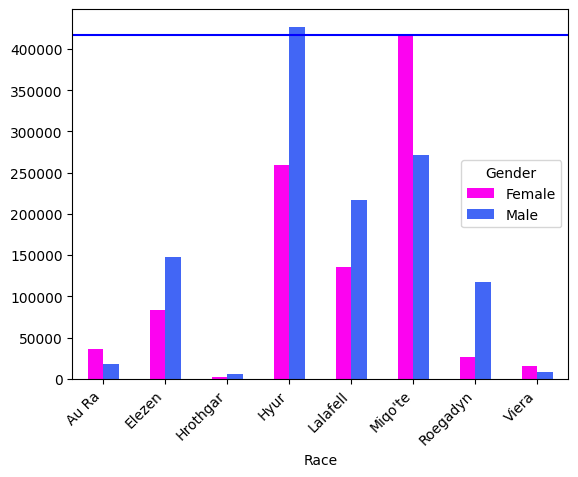

In [124]:
race_gender_counts_bar = race_gender_counts.plot.bar(
    color=['#fc03f0', '#4266f5'],
)
catgirl_count = race_gender_counts.at['Miqo\'te', 'Female']
race_gender_counts_bar.axhline(y=catgirl_count, color='b', linestyle='-')
pyplot.xticks(rotation=45, ha='right')
pyplot.show()

The blue line which shows the amount of catgirls breaks the common rumor... there are more Hyur (generic human) male characters in game, but not all lost yet!
Whenever you create a character in FFXIV it defaults to Hyur Male, so bot accounts are probably pushing this bar up.

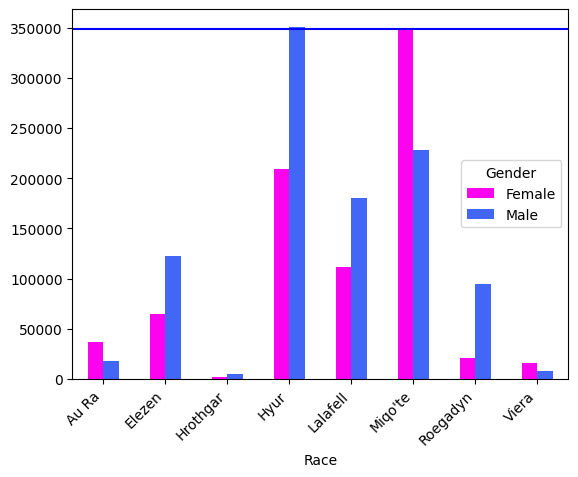

Hyur Male: 351_128
Miqo'te Female: 348_646


In [125]:
race_gender_counts = pandas.crosstab(data_no_lvl_1['Race'], data_no_lvl_1['Gender'])
race_gender_counts_bar = race_gender_counts.plot.bar(
    color=['#fc03f0', '#4266f5'],
)
catgirl_count = race_gender_counts.at['Miqo\'te', 'Female']
race_gender_counts_bar.axhline(y=catgirl_count, color='b', linestyle='-')
pyplot.xticks(rotation=45, ha='right')
pyplot.show()

print(f"Hyur Male: {race_gender_counts.at['Hyur', 'Male']:_}")
print(f"Miqo'te Female: {catgirl_count:_}")

Hyur Males just barely won, it turns out MMORPG players are not very creative and they mostly play as a human male.

## Most played job (gathering, crafting, and combat)

In [126]:
gathering_job_count = (data[gathering_jobs] > 0).sum().sort_values(ascending=False)
print(gathering_job_count.apply(lambda x : "{:_}".format(x)))
gathering_job_max = gathering_job_count.idxmax()
print(f"The most popular gathering job is: {gathering_job_max}")

MIN    654_462
BTN    604_404
FSH    573_898
dtype: object
The most popular gathering job is: MIN


In [127]:
crafting_job_count = (data[crafting_jobs] > 0).sum().sort_values(ascending=False)
print(crafting_job_count.apply(lambda x : "{:_}".format(x)))
crafting_job_max = crafting_job_count.idxmax()
print(f"The most popular crafting job is: {crafting_job_max}")

GSM    590_168
WVR    584_799
CRP    581_933
LTW    558_397
CUL    552_548
BSM    550_238
ARM    542_633
ALC    538_032
dtype: object
The most popular crafting job is: GSM


In [128]:
combat_job_count = (data[combat_jobs] > 0).sum().sort_values(ascending=False)
print(combat_job_count.apply(lambda x : "{:_}".format(x)))
combat_job_max = combat_job_count.idxmax()
print(f"The most popular combat job is: {combat_job_max}")

WHM    920_720
PLD    888_315
BRD    853_510
BLM    843_352
SMN    819_540
DRG    809_753
MNK    804_441
WAR    768_645
SCH    328_099
NIN    327_353
DRK    277_949
MCH    261_077
AST    241_281
SAM    241_030
RDM    231_352
GNB    181_067
BLU    178_484
DNC    176_236
RPR    142_877
SGE    135_587
VPR     87_572
PCT     84_173
dtype: object
The most popular combat job is: WHM


## When do players quit?
My original reason for this endeavour: Figuring out when do players quit FFXIV
To get this information we're checking the highest combat job level the player achieved.

max_combat_lvl
0       12401
1      365364
2       69574
3       69986
4       64793
        ...  
96       1091
97        904
98       1001
99        896
100    102250
Name: count, Length: 101, dtype: int64


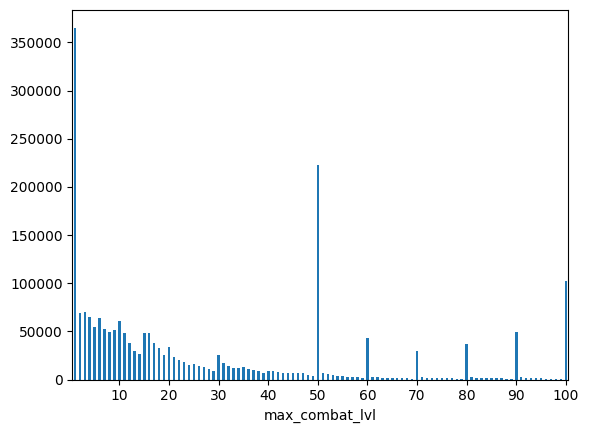

In [129]:
quit_level = data['max_combat_lvl'].value_counts().sort_index(ascending=True)
print(quit_level)
try:
    quit_level.drop(0, inplace=True) # 0 max level can be dropped, probably character was created and never logged in?
except KeyError:
    pass
ax = quit_level.plot.bar()
ticks = [i for i, value in enumerate(quit_level.index) if value % 10 == 0]
ax.set_xticks(ticks)
pyplot.xticks(rotation=0)
ax.set_xticklabels(quit_level.index[ticks])
pyplot.show()

We see some clear areas where players quit:
* 1: Probably bot account, or the player logged in and logged out immedietly
* 50, 60, 70, 80, and 90: These are final levels of expansions. Considering it can take a while for the new expansion to arrive players may choose to leave the game.
* 100 may appear to be a quiter level, but at the moment it's the maximum level a player can achieve.
Let's remove these as they won't reveal any new information for us.

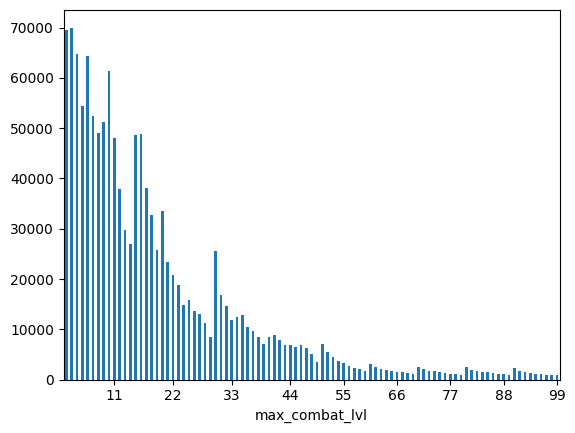

In [130]:
quit_level = data['max_combat_lvl'].value_counts().sort_index(ascending=True)
try:
    quit_level.drop([0,1], inplace=True)
except KeyError:
    pass
try:
    quit_level.drop([50, 60, 70, 80, 90], inplace=True)
except KeyError:
    pass
try:
    quit_level.drop(100, inplace=True)
except KeyError:
    pass
ax = quit_level.plot.bar()
ticks = [i for i, value in enumerate(quit_level.index) if value % 11 == 0]
ax.set_xticks(ticks)
pyplot.xticks(rotation=0)
ax.set_xticklabels(quit_level.index[ticks])
pyplot.show()

There is a visible spike of players quiting early in each expansion, I don't have a clear explanation for this.
But the biggest drop is at low-level players, so let's zoom in on them to learn more.

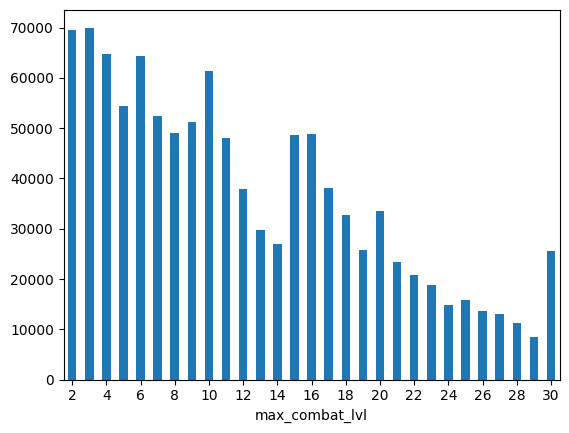

In [131]:
quit_level = data['max_combat_lvl'].value_counts().sort_index(ascending=True)
levels_to_drop = list(range(31, 101))
try:
    quit_level.drop([0, 1], inplace=True)
    quit_level.drop(levels_to_drop, inplace=True)
except KeyError:
    pass
ax = quit_level.plot.bar()
ticks = [i for i, value in enumerate(quit_level.index) if value % 2 == 0]
ax.set_xticks(ticks)
pyplot.xticks(rotation=0)
ax.set_xticklabels(quit_level.index[ticks])
pyplot.show()

The original rumor I was investigating failed: Most people don't quit around level 5 when they have to buy a piece of gear and run 10 meters.
But we have some interesting spikes at around level 15 and 30, so let's investigate those:

Level 15: That's when we reach the first dungeon in the game called [Sastasha](https://ffxiv.consolegameswiki.com/wiki/Sastasha). Players either queue as a DPS and have to wait for too long, or they're simply afraid of trying group content.

Level 30: I don't see anything special where players would struggle at. Most likely, players think they give this game a chance by playing until level 30 and some of them decides to not stay.